# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Profiling and Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* All of the data are numerical.
* There are a total of 9 columns.
* There are 768 rows of data.

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values for this dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After taking a look at the summary we can see there are many values which are 0 and this is not normal. For now we replace the values with Nan and perform necesary steps later.

In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [8]:
df.isnull().sum()*100/len(df)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Here we can see Insulin has 49%, SkinThickness has 30%, BloodPressure has 5%, BMI 1.5% and Glucose has 0.7% missing values

<Axes: >

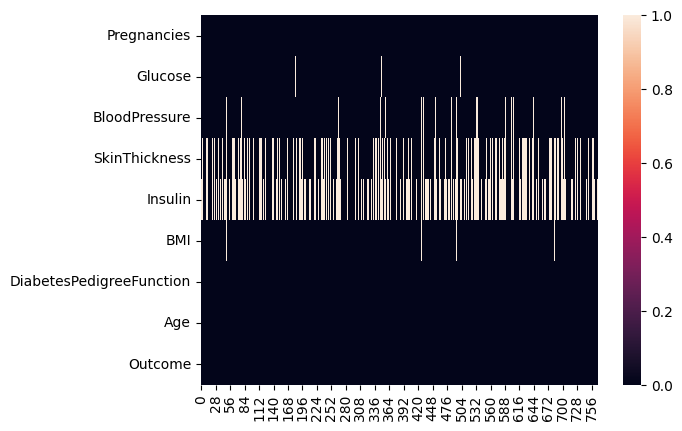

In [9]:
sns.heatmap(df.isnull().transpose())

# EDA

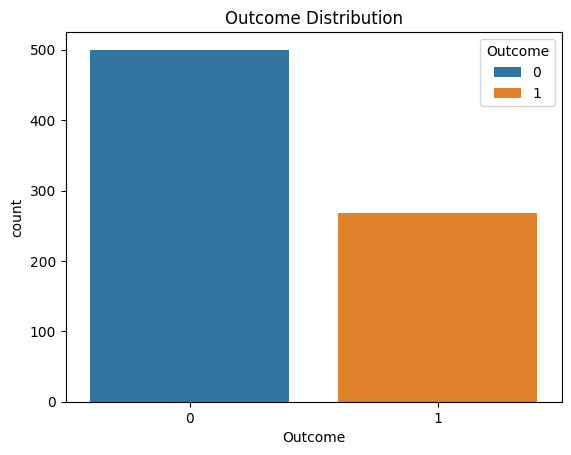

In [10]:
sns.countplot(df,x = 'Outcome', hue = 'Outcome')
plt.title('Outcome Distribution')
plt.show()


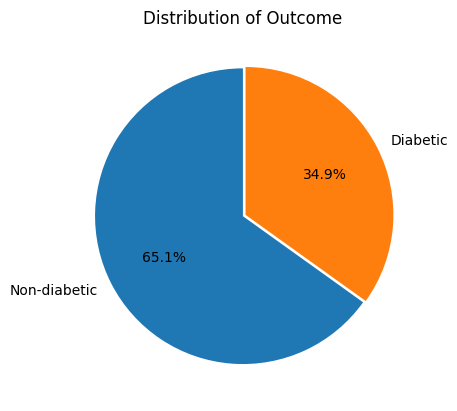

In [11]:
s = df.Outcome.value_counts()
plt.pie(s.values,labels = ['Non-diabetic','Diabetic'],autopct = '%.1f%%',startangle = 90, explode= [0,0.02])
plt.title('Distribution of Outcome')
plt.show()

Accuracy is not an ideal evaluation metric as this is an imbalanced data.

In [12]:
fig = px.histogram(df,x = 'Age',marginal = 'box',color = 'Outcome',title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)

<Axes: xlabel='Age', ylabel='Count'>

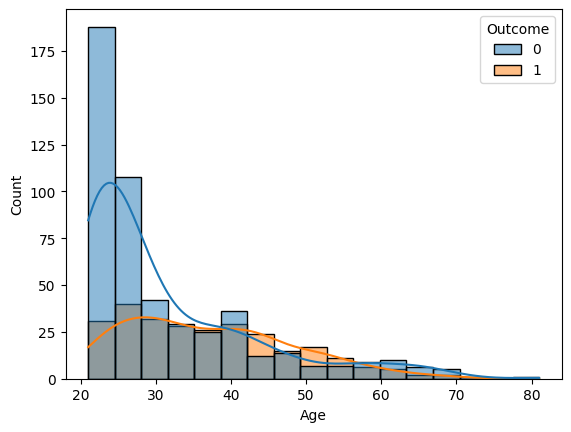

In [13]:
sns.histplot(data = df, x = 'Age', hue = 'Outcome', kde = True)

# Handling missing values

In [14]:
px.box(df)

It is clear that the columns which have missing values have outliers present.


Due to this reason we will fill median value in the place of missing values.

As the median value vary for the diabetic and non-diabetic people we will fill the value accordingly.

To fill the missing value we create a function.Then we fill the null rows of the columns calculating the median values for the columns for both diabetic and non-diabetic patients. After some consideration a new function is formulated which helps fill missing value with median for all the columns.

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
def fill_missing_val(df, col_name):
    def fill(cols):
        col_val = cols[col_name]
        outcome = cols['Outcome']
        if pd.isna(col_val):
            if outcome == 1:
                return df.loc[df['Outcome'] == 1, col_name].median()
            elif outcome == 0:
                return df.loc[df['Outcome'] == 0, col_name].median()
        else:
            return col_val

    df[col_name] = df[[col_name, 'Outcome']].apply(fill, axis='columns')


In [17]:
fill_missing_val(df, 'Insulin')
fill_missing_val(df, 'SkinThickness')
fill_missing_val(df, 'BloodPressure')
fill_missing_val(df, 'BMI')
fill_missing_val(df, 'Glucose')


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



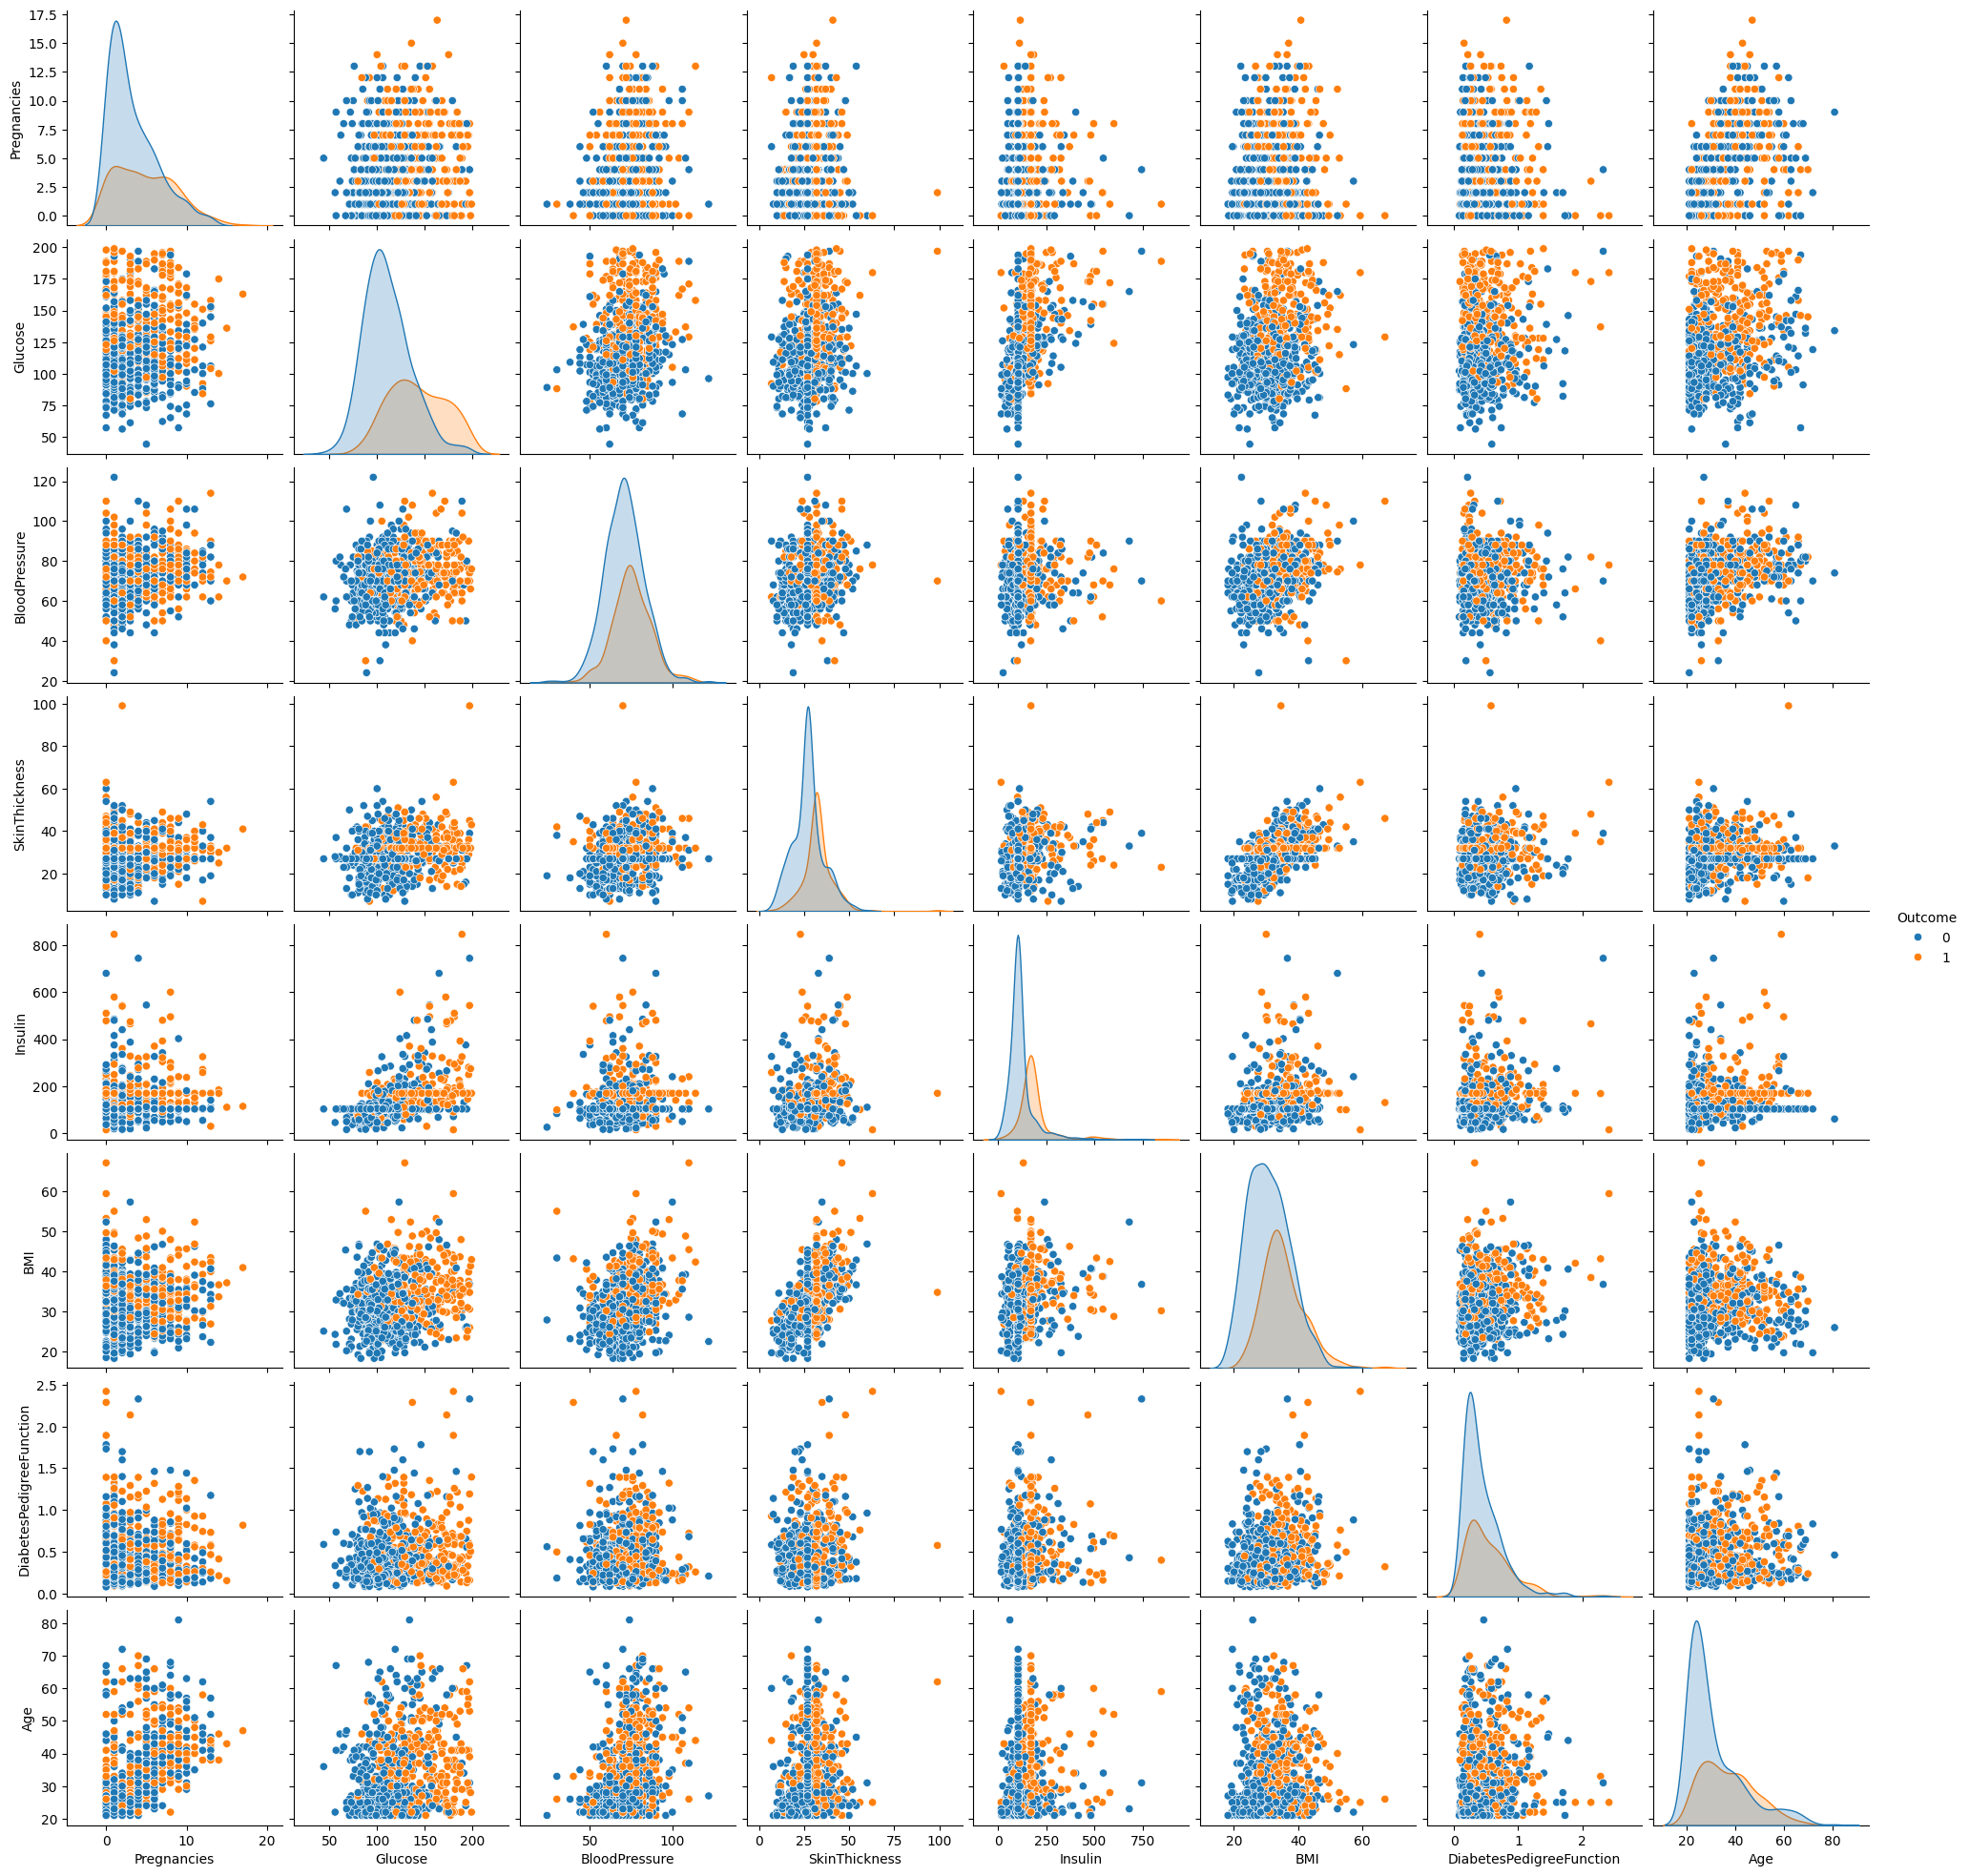

In [26]:
sns.pairplot(data = df,size = 2.5, hue = 'Outcome')
plt.show()

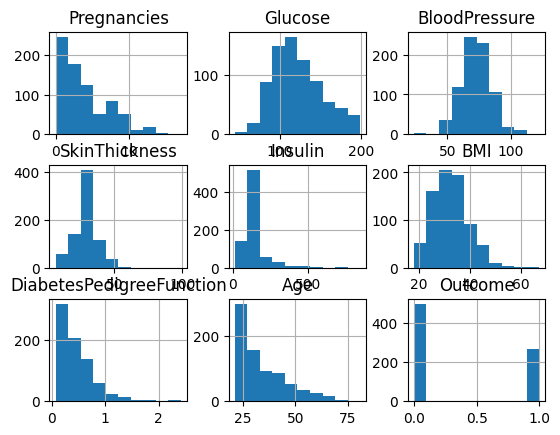

In [25]:
df.hist();

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


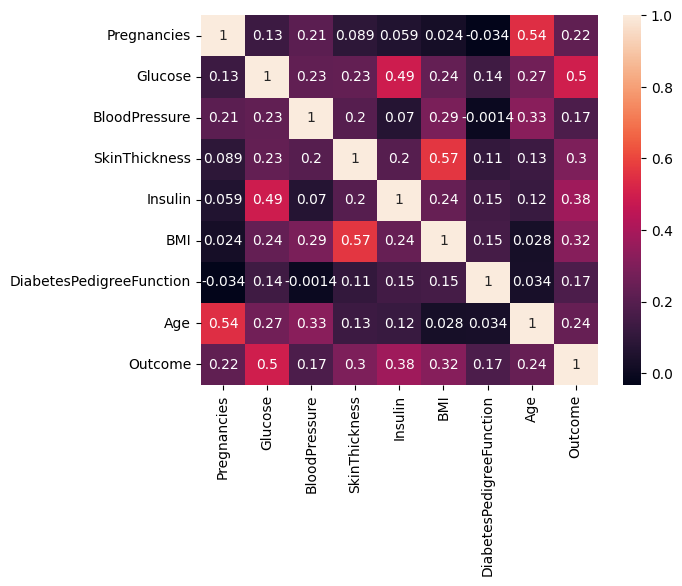

In [55]:
sns.heatmap(df.corr(),annot = True);

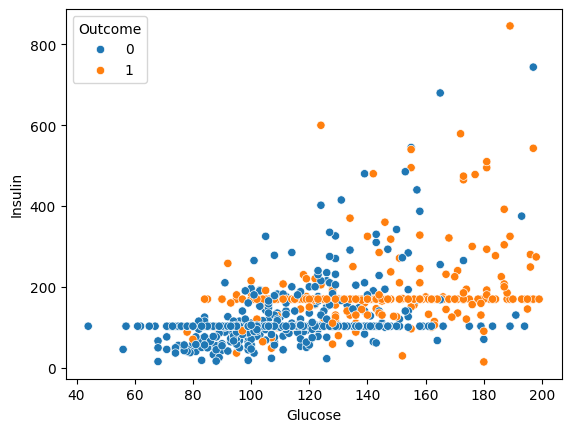

In [54]:
sns.scatterplot(data = df, x = 'Glucose', y = 'Insulin',hue= 'Outcome');

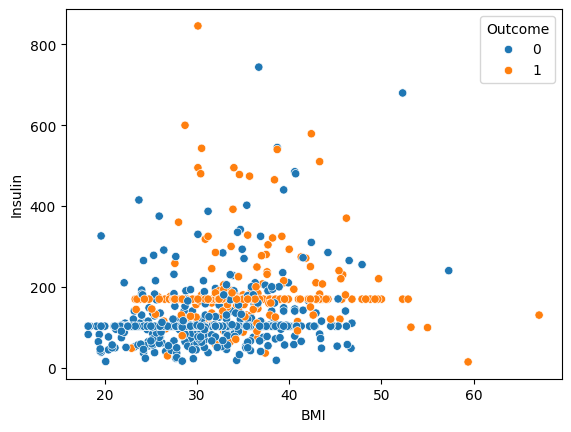

In [53]:
sns.scatterplot(data = df, x = 'BMI', y = 'Insulin',hue= 'Outcome');

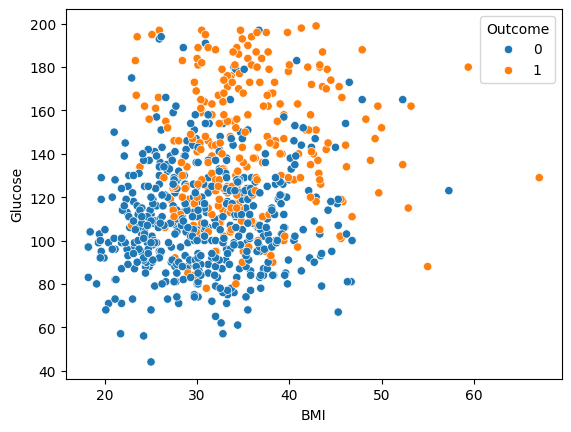

In [52]:
sns.scatterplot(data = df, x = 'BMI', y = 'Glucose',hue= 'Outcome');

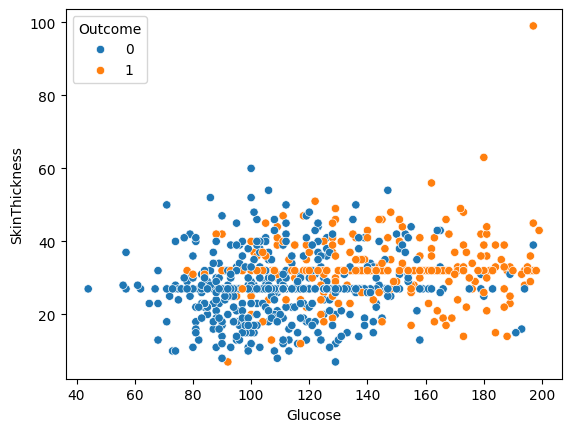

In [51]:
sns.scatterplot(data = df, x = 'Glucose', y = 'SkinThickness',hue= 'Outcome');

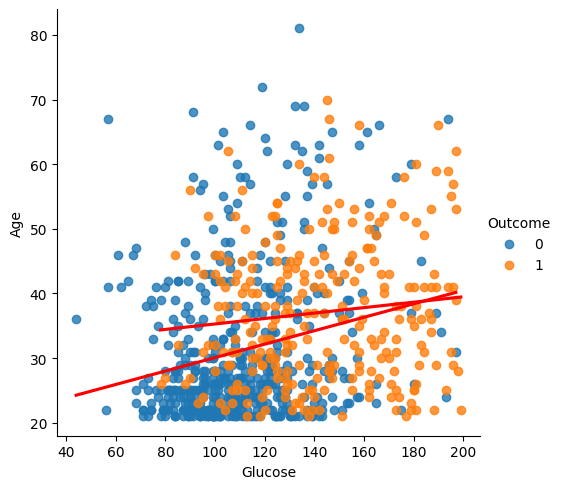

In [50]:
sns.lmplot(data = df, x = 'Glucose', y= 'Age',line_kws = {'color':'red'}, ci = False,hue = 'Outcome');

# Identifying features and labels

In [58]:
X = X = df.iloc[:, :-1]
y = df.Outcome

# Splitting data into Training and Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [60]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [61]:
X_test.shape, y_test.shape

((154, 8), (154,))

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 7000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=7000)

In [65]:
y_pred = model.predict(X_test)

# Evaluation

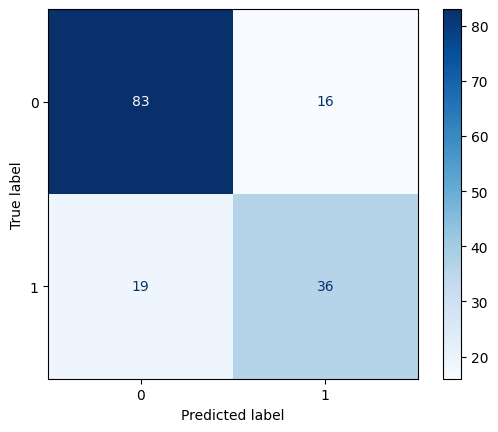

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap = 'Blues');


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true = y_test, y_pred = y_pred)
recall = recall_score(y_true = y_test, y_pred = y_pred)
f1 = f1_score(y_true = y_test, y_pred = y_pred)
print(f"Precision = {round(precision*100,2)}")
print(f"Recall = {round(recall*100,2)}")
print(f"f1_score = {round(f1*100,2)}")

Precision = 69.23
Recall = 65.45
f1_score = 67.29


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# SVM

In [71]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

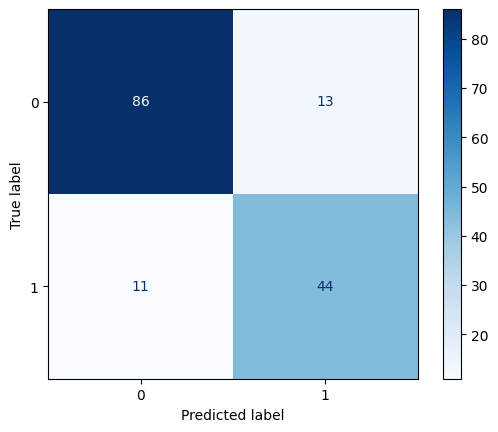

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap = 'Blues');


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true = y_test, y_pred = y_pred)
recall = recall_score(y_true = y_test, y_pred = y_pred)
f1 = f1_score(y_true = y_test, y_pred = y_pred)
print(f"Precision = {round(precision*100,2)}")
print(f"Recall = {round(recall*100,2)}")
print(f"f1_score = {round(f1*100,2)}")

Precision = 77.19
Recall = 80.0
f1_score = 78.57


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.77      0.80      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.84      0.84       154



# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)# hyperparameter to be tuned
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

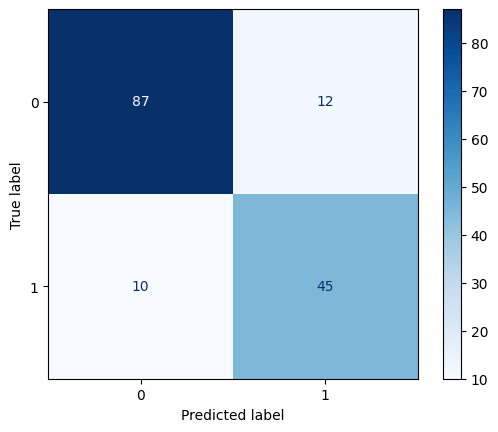

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap = 'Blues');

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true = y_test, y_pred = y_pred)
recall = recall_score(y_true = y_test, y_pred = y_pred)
f1 = f1_score(y_true = y_test, y_pred = y_pred)
print(f"Precision = {round(precision*100,2)}")
print(f"Recall = {round(recall*100,2)}")
print(f"f1_score = {round(f1*100,2)}")

Precision = 78.95
Recall = 81.82
f1_score = 80.36


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        99
           1       0.74      0.82      0.78        55

    accuracy                           0.83       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.83      0.83       154



# Hyperparameter Tuning

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,max_depth=2, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

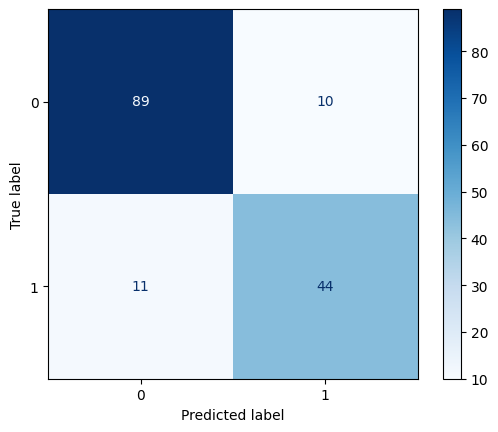

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap = 'Blues');

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true = y_test, y_pred = y_pred)
recall = recall_score(y_true = y_test, y_pred = y_pred)
f1 = f1_score(y_true = y_test, y_pred = y_pred)
print(f"Precision = {round(precision*100,2)}")
print(f"Recall = {round(recall*100,2)}")
print(f"f1_score = {round(f1*100,2)}")

Precision = 81.48
Recall = 80.0
f1_score = 80.73


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.81      0.80      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

